# <center> Time series segmentation / Change point detection </center>

## Что это? 

Еще одна из задач, возникающая с временными рядами, - сегментация и поиск точек "перелома", в которых временной ряд начинает вести себя не так, как раньше. 

<img src="pictures/segments.png" width=600>

## Зачем? 

Сегментация может внезапно возникать в самых разных ситуациях:
- Поиск аномального изменения временного ряда, например, при считывании показателей датчиков, анализа трафика в сети
- Поиск "интересных" сегментов во временном ряду, например, активности в данных акселерометра, нестандартных участком геномных последовательностей
- Извлечение дополнительных признаков из временного ряда - сколько раз изменялась структура, сколько разных состояний было
- И наверняка еще много примеров, но вот так сразу в голову пришли вот эти три :)

# <center> Типы изменений во временных рядах </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
x1 = np.arange(0, 50, 0.1)
x2 = np.arange(50, 100, 0.1)

## Структурный сдвиг / location shift

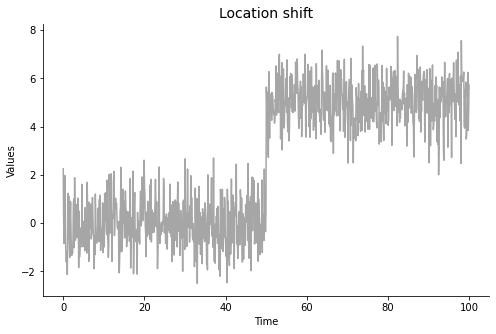

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(
    np.concatenate((x1, x2)), 
    np.concatenate((
        np.random.normal(loc=0.0, size=len(x1)), 
        np.random.normal(loc=5.0, size=len(x2))
    )),
    color='grey',
    alpha=0.7
)
sns.despine()
plt.title("Location shift", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

## Изменение дисперсии (кластеры волатильности) / scale shift

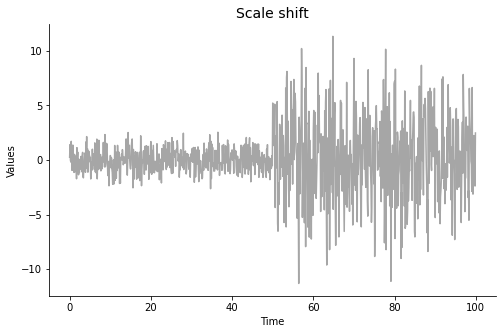

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(
    np.concatenate((x1, x2)), 
    np.concatenate((
        np.random.normal(loc=0.0, scale=1.0, size=len(x1)), 
        np.random.normal(loc=0.0, scale=4.0, size=len(x2))
    )),
    color='grey',
    alpha=0.7
)
sns.despine()
plt.title("Scale shift", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

## Изменение сезонности / seasonality shift

https://anomaly.io/change-point-detection-seasonal/index.html

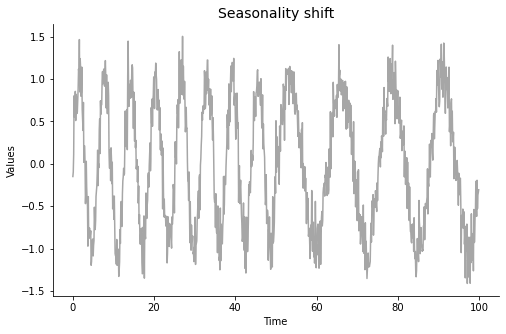

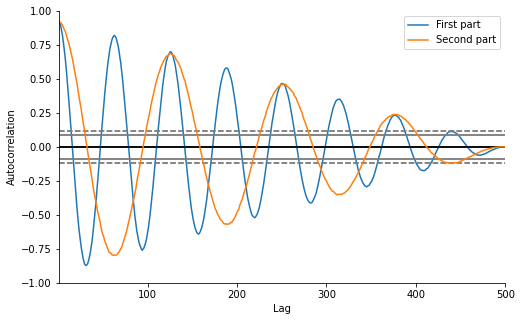

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(
    np.concatenate((x1, x2)), 
    np.concatenate((
        np.sin(x1) + np.random.normal(loc=0.0, scale=.2, size=len(x1)), 
        np.sin(x2/2) + np.random.normal(loc=0.0, scale=.2, size=len(x2)))
    ),
    color='grey',
    alpha=0.7
)
sns.despine()
plt.title("Seasonality shift", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

plt.figure(figsize=(8, 5))
pd.plotting.autocorrelation_plot(
    np.sin(x1) + np.random.normal(loc=0.0, scale=.2, size=len(x1)),
    label='First part'
)
pd.plotting.autocorrelation_plot(
    np.sin(x2/2) + np.random.normal(loc=0.0, scale=.2, size=len(x2)), 
    label='Second part'
)
sns.despine()
plt.show()

## Как? 

**Основная идея** - задать некоторую функцию "похожести" кусков временного ряда друг на друга. Различия методов будут происходить от разных вариантов задания функций и разных способов определения кусков :) 

Важное разделение - онлайн/оффлайн алгоритмы.

### Онлайн алгоритмы:
- Сегментируют ряд по мере поступления его новых значений
- Результаты сегментации в прошлом не могут изменяться в зависимости от новых наблюдений
- Обычно приближенная (approximate) сегментация

### Оффлайн алгоритмы:
- Работают со всем временным рядом сразу
- Результаты исторической сегментации могут измениться, если мы добавим новые значения 
- Обычно точная (exact) сегментация

Однако на практике оффлайн методы иногда неплохо заходят в онлайн сценариях ¯\\_(ツ)_/¯